In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 
import numpy as np 
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import helper
import math
import torch.nn.functional as F
from torch import optim
import cv2



In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/gi4e_database.zip', 'r') as zip:
  A = zip.extractall()


In [4]:
from zipfile import ZipFile
A = ZipFile('/content/drive/MyDrive/gi4e_database.zip')
names = A.namelist()



In [5]:

###Save image to list and grayscale them 

In [6]:
from google.colab.patches import cv2_imshow
images = [] 
ind = 1 
s=''
for i in range(1,len(names)):
  if i ==1237:
    break
  image = cv2.imread(names[i])
  images.append(cv2.cvtColor(image , cv2.COLOR_BGR2GRAY))

In [7]:
all_targ  = names[1237:][-2]

In [8]:
new_im = [im/255 for im in images]

In [9]:

def img_drow(path,num_of_im, num_of_vers):
  with open(path, 'r') as f : 
    s = list(f)
  s=s[num_of_vers].split('\t')  
  s[-1] = s[-1].strip()
  s=s[1:]

  x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6 = s
  x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6 = float(x1) ,float(y1) , float(x2) ,float(y2) ,float(x3),float(y3) , float(x4),float(y4), float(x5) ,float(y5),float(x6),float(y6)
  pict1  = cv2.rectangle(images[(num_of_im-1)*12 + num_of_vers],(int(x1)-1,int(y1)-1),(int(x3)+1,int(y3)+1),(255,0,0),1)
  cv2_imshow(pict1)
  pict1 = (cv2.rectangle(pict1,(int(x4)-1,int(y4)-1),(int(x6)+1,int(y6)+1),(255,0,0),1))
  cv2_imshow(pict1)
  pict1 = (cv2.circle(pict1,(int(x2),int(y2)),3,(0,0,255),-1))
  cv2_imshow((cv2.circle(pict1,(int(x5),int(y5)),3,(0,255,255),-1)))
    #cv.rectangle(image, )


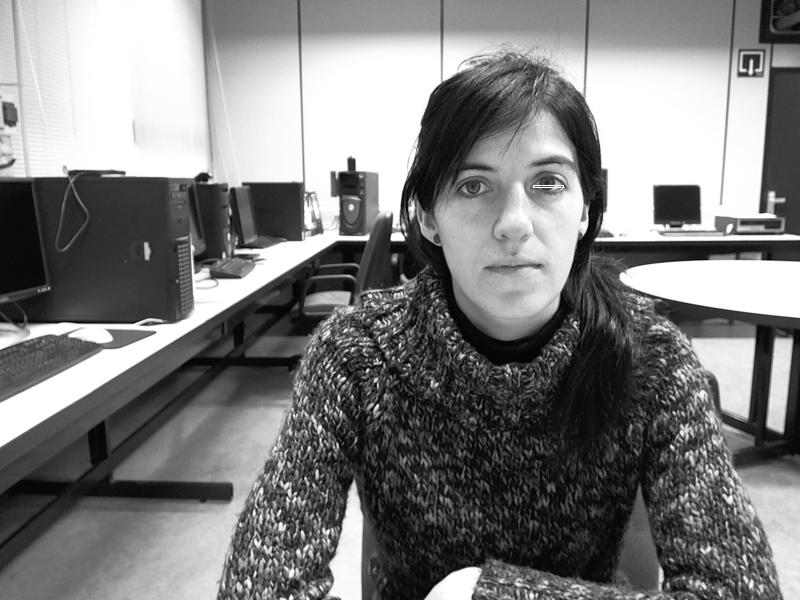

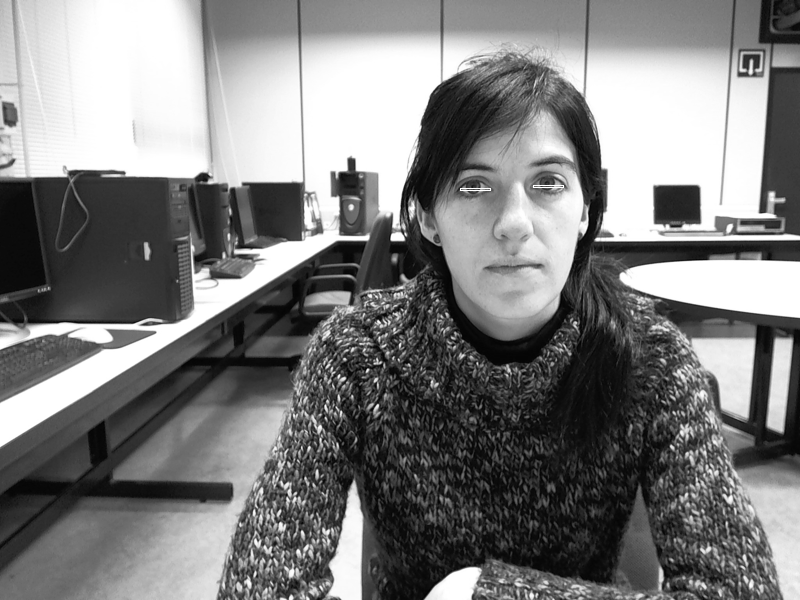

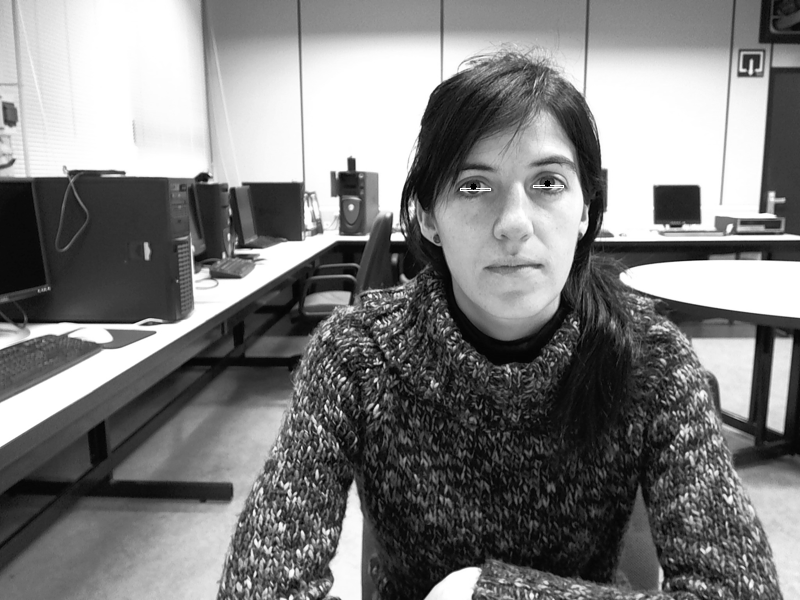

In [10]:
img_drow("/content/labels/004_image_labels.txt", 4,3)

In [ ]:
with open("/content/labels/001_image_labels.txt", 'r') as f : 
    s = list(f)
    #cv.rectangle(image, 

In [11]:
text = names[1239:-2]


In [ ]:
text[0]

'labels/001_image_labels.txt'

1.0

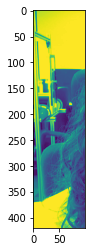

In [ ]:
T = new_im[0][80:500, 200:300 ]
plt.imshow(T)
new_im[0].max()

In [ ]:
(new_im[0].shape[1])

800

In [12]:
NEW_im_l = []
NEW_im_r = []
targ_l = [] 
targ_r = []
def get_im(ind):

  with open(text[ind], 'r') as f :
    s = list(f)


    for i in range(12) :      #cv.rectangle(image,
      K = s[i].split()  
      iris_l = np.zeros_like(new_im[0])
      iris_r  = np.zeros_like(new_im[0])
      x1 = K[1]
      y1 = K[2]
      x2 = K[3]
      y2 = K[4] 
      x3 = K[5]
      y3 = K[6]
      x4  = K[7]
      y4 =  K[8]
      x5= K[9]
      y5= K[10]
      x6 = K[11] 
      y6 = K[12]

      iris_l[int(float(y2)) , int(float(x2))] = 1
      iris_r[int(float(y5)), int(float(x5))] = 1 
   

      new_l  = cv2.resize(new_im[ind*12 + i][ int(float(y1))-24 : int(float(y3))+24 , int(float(x3)):int(float(x1))] ,(48,48))
      #new_r = cv2.resize(new_im[ind*12 + i][ int(float(y4))-24 : int(float(y6))+24 , int(float(x6)):int(float(x4))] ,(48,48))

      iris_l =  cv2.resize(iris_l[ int(float(y1))-24 : int(float(y3))+24 , int(float(x3)):int(float(x1))],(48,48))
     # iris_r =  iris_r[ int(float(y4))-24 : int(float(y6))+24 , int(float(x6)):int(float(x4))]
      NEW_im_l.append(new_l)
     # NEW_im_r.append(new_r)
      targ_l.append(iris_l)
    #  targ_r.append(iris_r)
         
        #cv.rectangle(image, 
    


In [13]:
for beg in range(len(text)):
  get_im(beg)

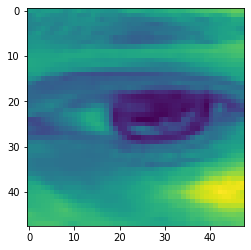

In [14]:
plt.imshow(NEW_im_l[20])

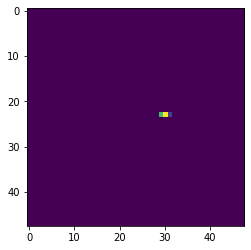

In [15]:
plt.imshow(targ_l[20])

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(np.array(NEW_im_l)  , np.array(targ_l) , test_size = 0.1, random_state=42)


In [ ]:
X_train[-1]

array([[0.29722222, 0.30053104, 0.30005106, ..., 0.37654545, 0.36282679,
        0.33415032],
       [0.28578431, 0.31197917, 0.33049428, ..., 0.39309637, 0.38385417,
        0.35490196],
       [0.34297385, 0.34582312, 0.33383374, ..., 0.40524911, 0.40819036,
        0.37271242],
       ...,
       [0.77009805, 0.75070467, 0.7381434 , ..., 0.97611994, 0.9825674 ,
        0.98431373],
       [0.81029412, 0.78272059, 0.76260212, ..., 0.97536764, 0.9801777 ,
        0.98431373],
       [0.84199343, 0.81754489, 0.8006093 , ..., 0.97063249, 0.9744996 ,
        0.9767974 ]])

In [28]:
batch_size = 5
test_batch_size = 20

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.Tensor(data)
        self.data = self.data[:,None,:]
        print(self.data.shape)
        self.targets = torch.Tensor(targets)
        self.targets = self.targets[:,None, :]

        print(self.data.shape)
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y
    
    def __len__(self):
        return len(self.data)


train = MyDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=batch_size)
test = MyDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=batch_size)

torch.Size([1112, 1, 48, 48])
torch.Size([1112, 1, 48, 48])
torch.Size([124, 1, 48, 48])
torch.Size([124, 1, 48, 48])


In [33]:
class Net(nn.Module):
  def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=2, stride=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=5, padding=2, stride=1)
        self.transpose1 = nn.ConvTranspose2d(256, 128, kernel_size=2, padding=0, stride=2)
        self.transpose2 = nn.ConvTranspose2d(128, 64, kernel_size=2, padding=0, stride=2)
        self.transpose3 = nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1, stride=1)
        self.transpose_base2 = nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1, stride=1)
        self.transpose_base1 = nn.ConvTranspose2d(256, 64, kernel_size=4, padding=0, stride=4)
        self.conv2_drop = nn.Dropout2d(p=0.25)

  def forward(self, x):
        ##Encoder
        #1 layer
        #x = x 1x48x48
        x = self.conv1(x) #64x48x48
        x = F.relu(x)
        x1 = x #64x48x48
        #2 layer
        x = self.conv2(x) #128x48x48
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2) #128x24x24
        x = F.relu(x)
         #128x24x24
        #3 layer
        x = self.conv3(x) #256x24x24
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2) #256x12x12
        x = F.relu(x) 
        y = x
        
        ##Decoder Based
        #1 layer
        x = self.transpose_base1(x) #64x48x48
        x = self.conv2_drop(x)
        x = torch.cat([x, x1], axis=1) #128x48x48
        x = F.relu(x)
        #2 layer
        x = self.transpose_base2(x) #64x48x48
        x = self.conv2_drop(x)
        x = F.relu(x)
        #3 layer
        x = self.transpose3(x) #1x48x48
        x = F.sigmoid(x)
        
        ##Decoder Auxiliary
        #1 layer
        #y = self.conv3(y) #256x12x12
        #y = self.conv2_drop(y)
        #y = F.max_pool2d(y, 2)
        #y = F.relu(y)
        #2 layer
        y = self.transpose1(y) #128x24x24
        y = self.conv2_drop(y)
        #y = F.max_unpool2d(y, kernel_size=2, stride=2, indices=idx)
        y = F.relu(y)
        #3 layer
        y = self.transpose2(y) #64x48x48
        y = self.conv2_drop(y)
        #y = F.max_unpool2d(y, kernel_size=2, stride=2, indices=idx)
        y = F.relu(y)
        #4 layer
        y = self.transpose3(y) #1x48x48
        y = self.conv2_drop(y)
        y = F.sigmoid(y)
        #print(torch.stack([x, y]).shape)
        return torch.stack([y, x], dim=2).squeeze(1).to(device)
        #return (y, x)

In [34]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1) ,
            nn.ReLU()
            )
        self.encoder_2=  nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2, stride=1),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=5, padding=2, stride=1),
            nn.Dropout2d(0.2),
            nn.ReLU()
            )

        self.decoder_1 = nn.Sequential(
           nn.ConvTranspose2d(256, 64, kernel_size=4, padding=0, stride=4),
           nn.Dropout2d(0.2)
        )
        self.decoder_2 = nn.Sequential(
          nn.ReLU,
          nn.ConvTranspose2d(128, 64, kernel_size=3, padding=1, stride=1),
          nn.Dropout2d(0.2),
          nn.ReLU(),
          nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1, stride=1)
        )
        self.decoder_aux = nn.Sequential(
           nn.ConvTranspose2d(256, 128, kernel_size=2, padding=0, stride=2),
           nn.Dropout2d(0.2),
           nn.ReLU(),
           nn.ConvTranspose2d(128, 64, kernel_size=2, padding=0, stride=2),
           nn.Dropout2d(0.2),
           nn.ReLU(),
           nn.ConvTranspose2d(64, 1, kernel_size=3, padding=1, stride=1),
           nn.Dropout2d(0.2)
        )
        

    def forward(self, x):
        x  = self.encoder_1(x)
        x1 = x
        y = self.encoder_2(x)
        x = self.decoder_1(x)
        x = torch.cat([x, x1], axis=1) #128x48x48
        x = nn.Sigmoid(self.decoder_2(x))
        y = nn.Sigmoid(self.decoder_aux(y))

        return torch.stack([y, x], dim=2).squeeze(1).to(device)


#Instantiate the model
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (transpose1): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
  (transpose2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
  (transpose3): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (transpose_base2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (transpose_base1): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv2_drop): Dropout2d(p=0.25, inplace=False)
)


In [182]:
num_epochs = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
outputs = []
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr= 1e-3, weight_decay = 1e-5)
for epoch in range(num_epochs):
  for img, label in train_loader:
    img, label = img.to(device), label.to(device)
    recon = model(img)
    #loss = criterion(recon[:,1:2,],img)
    loss = criterion(recon[:, 0:1,],label)
    #loss += loss2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch :{epoch+1}, Loss : {loss.item():.4f}")
  outputs.append((epoch,img,recon))  

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch :1, Loss : 0.0002
Epoch :2, Loss : 0.0002
Epoch :3, Loss : 0.0002
Epoch :4, Loss : 0.0002
Epoch :5, Loss : 0.0002
Epoch :6, Loss : 0.0002
Epoch :7, Loss : 0.1249
Epoch :8, Loss : 0.1250
Epoch :9, Loss : 0.0002
Epoch :10, Loss : 0.1250
Epoch :11, Loss : 0.0002
Epoch :12, Loss : 0.0002
Epoch :13, Loss : 0.1249
Epoch :14, Loss : 0.0002
Epoch :15, Loss : 0.1250
Epoch :16, Loss : 0.0002
Epoch :17, Loss : 0.0002
Epoch :18, Loss : 0.0002
Epoch :19, Loss : 0.1250
Epoch :20, Loss : 0.0002
Epoch :21, Loss : 0.0002
Epoch :22, Loss : 0.1250
Epoch :23, Loss : 0.1249
Epoch :24, Loss : 0.1249
Epoch :25, Loss : 0.0002


KeyboardInterrupt: ignored

In [187]:
np.where(np.array([[1,2,3],[5,3,1111],[0,0,0]])==np.max(np.array([[1,2,3],[5,3,1111],[0,0,0]])))[0]

array([1])

In [114]:
outputs[5][2][0].she

torch.Size([48, 48])

In [181]:
outputs[4][2].cpu().detach().numpy()[0][0].min()

1.938288e-05

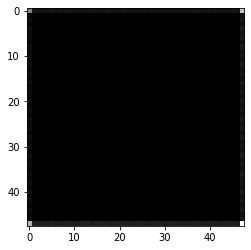

In [178]:
plt.imshow(outputs[4][2].cpu().detach().numpy()[0][0], cmap="gray")

In [177]:
(outputs[0][2].cpu().detach().numpy()[0][0]*255)

array([[127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       ...,
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5]], dtype=float32)

In [42]:
outputs[0][2].shape

torch.Size([2, 2, 48, 48])

In [ ]:
for k in range(0, 5):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
#  for i ,item in enumerate(imgs):
#    if i >=9: break
#    plt.subplot(2,9,9+i+1)
#    plt.imshow(item[0])
  for i ,item in enumerate(recon):
     if i >=9: break
     #plt.subplot(2,9,9+i+1)
     plt.imshow(item[0])  


THIS TRUE IM


ValueError: ignored

<Figure size 648x144 with 0 Axes>

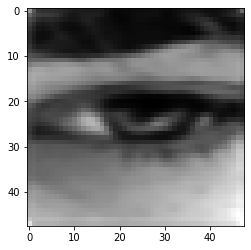

In [ ]:
plt.imshow(outputs[2][2].detach().numpy()[0][0])

In [ ]:
m(torch.zeros((1,1,48,48))).shape

torch.Size([1, 64, 48, 48])

In [ ]:
m = nn.Conv2d(1, 64, 1,padding=0)  
m(torch.zeros(1,1,48,48)).shape

torch.Size([1, 64, 48, 48])

In [ ]:
torch.zeros((1,1,48,48)).shape

torch.Size([1, 1, 48, 48])

In [ ]:
print(k)

5
